In [222]:
import pandas as pd 
import numpy as np 
#using linear regression and house price dataset. build the model for the prediction of the house price 
df = pd.read_csv(r'C:\Users\HP\Desktop\python.class\house_price_prediction.csv')
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [223]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [225]:
df['date'] = pd.to_datetime (df['date']) 

In [226]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

In [227]:
df.drop (['date', 'country', 'statezip', 'street'], axis =1, inplace = True)

In [228]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year,month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,2014,May
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,2014,May
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,2014,May
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,2014,May
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,2014,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,2014,July
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,2014,July
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,2014,July
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,2014,July


In [229]:
## create a new feature : agesincerenvation
currentyear= 2014
df ['age_since_renovation'] = df.apply(lambda row: currentyear - row['yr_renovated'] if row['yr_renovated'] > 0 else currentyear- row['yr_built'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,year,month,age_since_renovation
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,2014,May,9
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,2014,May,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,2014,May,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,2014,May,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,2014,May,22


In [230]:
df.drop(['yr_built', 'yr_renovated'], axis = 1, inplace= True)

In [231]:
df.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,year,month,age_since_renovation
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,2014,May,9
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,2014,May,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,2014,May,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,2014,May,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,2014,May,22


In [232]:
df.rename({'sqft_basement' : 'basement_area'}, axis=1, inplace=True)
df.rename({'sqft_lot' : 'lot_size'}, axis=1, inplace=True)
df.rename({'sqft_above' : 'above_ground_living_area'}, axis=1, inplace=True)
df.rename({'sqft_living' : 'living_area'}, axis=1, inplace=True)

In [233]:
df.head()

,price,bedrooms,bathrooms,living_area,lot_size,floors,waterfront,view,condition,above_ground_living_area,basement_area,city,year,month,age_since_renovation
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,2014,May,9
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,2014,May,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,2014,May,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,2014,May,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,2014,May,22


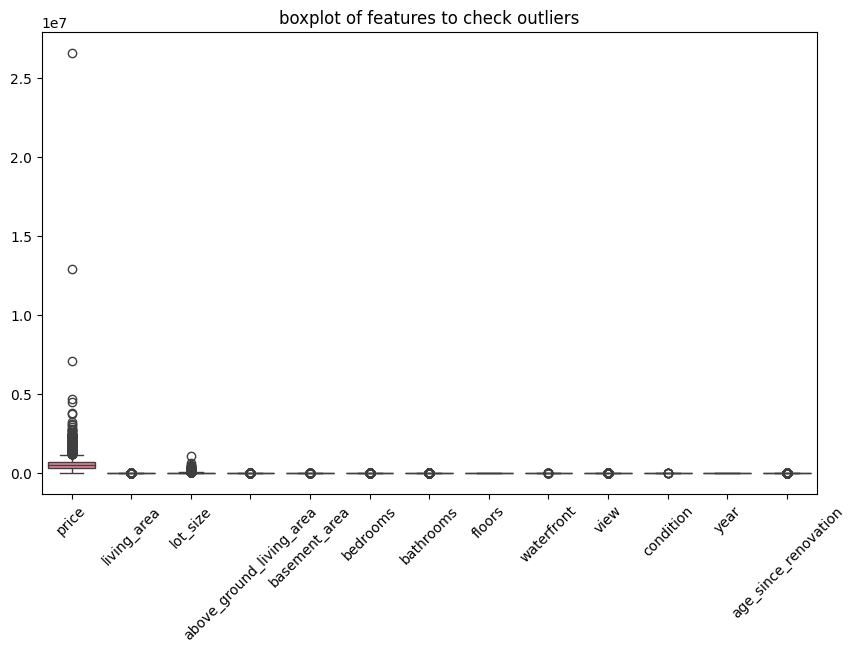

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10,6))
sns.boxplot(data = df[['price','living_area', 'lot_size','above_ground_living_area','basement_area', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'view', 'condition', 'year', 'age_since_renovation']])
plt.xticks(rotation = 45)
plt.title("boxplot of features to check outliers")
plt.show()

In [201]:
from scipy.stats.mstats import winsorize
df['price'] = winsorize (df['price'], limits = [0.05, 0.05])

In [204]:
df['lot_size'] = winsorize (df['lot_size'], limits = [0.05, 0.05])

In [196]:
df_no_outliers = df[~((df < lowerbound) | (df > upperbound)).any(axis=1)]

In [181]:
cat_cols = df.select_dtypes (include =['object']).columns
cat_cols

Index(['city', 'month'], dtype='object')

In [182]:
num_col = df.select_dtypes(include =[ "int", "float"]).columns
num_col

Index(['price', 'bedrooms', 'bathrooms', 'living_area', 'lot_size', 'floors',
       'waterfront', 'view', 'condition', 'above_ground_living_area',
       'basement_area', 'year', 'age_since_renovation'],
      dtype='object')

In [183]:
ordinal_cols =['month']
nominal_cols = ['city']

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

oe = OrdinalEncoder()
df[ordinal_cols] = oe.fit_transform (df[ordinal_cols])
le = LabelEncoder()
df[nominal_cols] = oe.fit_transform (df[nominal_cols])

In [ ]:
df

,price,bedrooms,bathrooms,living_area,lot_size,floors,waterfront,view,condition,above_ground_living_area,basement_area,city,year,month,age_since_renovation
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,36.0,2014,2.0,9
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,35.0,2014,2.0,93
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,18.0,2014,2.0,48
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,3.0,2014,2.0,51
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,31.0,2014,2.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,35.0,2014,0.0,35
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,3.0,2014,0.0,5
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,32.0,2014,0.0,5
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,35.0,2014,0.0,40


In [185]:
## split into dependent and independent 
x = df.drop(['price'], axis = 1)
y = df['price']

In [186]:
## split into test train split and standardize it.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x_test = scaler.fit_transform(x_test)
sc_x_train = scaler.fit_transform(x_train)


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#training the linear_regression_model
model = LinearRegression()
model.fit(sc_x_train, y_train)


LinearRegression()

In [ ]:
print("Coefficients: ", model.coef_)
print ('Intercept:', model.intercept_)

Coefficients:  [-4.38126917e+04  9.30522304e+03  1.29841755e+05 -2.28782000e+04
  7.01446088e+03  2.84304565e+04  4.41122574e+04  3.02827305e+04
  1.10751721e+05  6.58979223e+04  3.66376233e+04  1.81898940e-12
 -5.60201352e+03  7.76821780e+03]
Intercept: 544549.0494603721


In [ ]:
##make predictions
y_pred = model.predict(sc_x_test)

In [190]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score (y_test, y_pred)

print(f'mean absolute error(mae): {mae:.2f}')
print (f'mean squared error(mse): {mse:.2f}')
print (f'root mean sqaured error(rmse): {rmse:.2f}')
print (f'r2 score: {r2:.2f}')

mean absolute error(mae): 186088.74
mean squared error(mse): 566634440555.54
root mean sqaured error(rmse): 752751.25
r2 score: 0.10


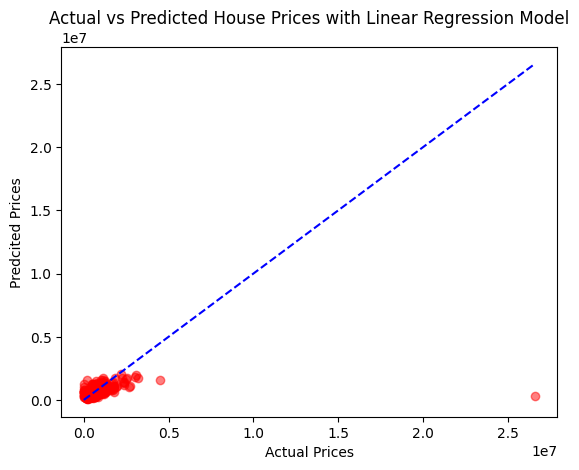

In [191]:
## visualize predictions
import seaborn as sns
import matplotlib.pyplot as plt 

plt.scatter(y_test, y_pred, alpha=0.5, color = 'red')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'blue', linestyle = '--')
plt.xlabel ("Actual Prices")
plt.ylabel ("Predcited Prices")
plt.title ("Actual vs Predicted House Prices with Linear Regression Model")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11188\1121336353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Coefficient', y='Feature', data=coef_df, palette= 'coolwarm', legend = False)


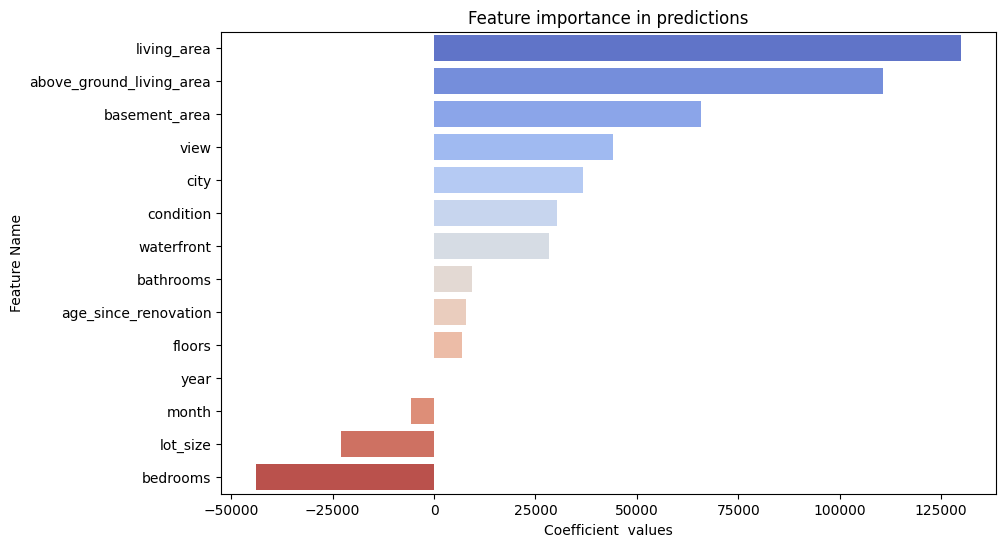

In [193]:
coef_df = pd.DataFrame ({'Feature' : x.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by = "Coefficient", ascending = False)

plt.figure (figsize=(10, 6))
sns.barplot(x= 'Coefficient', y='Feature', data=coef_df, palette= 'coolwarm', legend = False)
plt.xlabel ("Coefficient  values")
plt.ylabel ("Feature Name")
plt.title ("Feature importance in predictions")
plt.show()
